# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [61]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [62]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [63]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [64]:
ls

sample_data/  sonar.csv


In [65]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv("sonar.csv")

In [66]:
print(data)

     0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0027  0.0065  0.0159  0.0072  0

## Do some magic below! ;)

 # 1. Preprocesar los datos

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [68]:
# Separar características (X) y etiquetas (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [69]:
# Convertir las etiquetas de texto a números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [70]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# PRUEBA 1

Este primer modelo es un modelo simple con pocas capas y pocas neuronas para ver una red simple como es capaz de resolver el problema

In [71]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=80, batch_size=100, validation_split=0.2)


Epoch 1/80
2/2 [==============================] - 2s 256ms/step - loss: 0.7116 - accuracy: 0.5076 - val_loss: 0.7033 - val_accuracy: 0.4242
Epoch 2/80
2/2 [==============================] - 0s 47ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5758
Epoch 3/80
2/2 [==============================] - 0s 46ms/step - loss: 0.6802 - accuracy: 0.6591 - val_loss: 0.6788 - val_accuracy: 0.6667
Epoch 4/80
2/2 [==============================] - 0s 64ms/step - loss: 0.6719 - accuracy: 0.6591 - val_loss: 0.6697 - val_accuracy: 0.6364
Epoch 5/80
2/2 [==============================] - 0s 59ms/step - loss: 0.6667 - accuracy: 0.6364 - val_loss: 0.6624 - val_accuracy: 0.6364
Epoch 6/80
2/2 [==============================] - 0s 50ms/step - loss: 0.6584 - accuracy: 0.6894 - val_loss: 0.6586 - val_accuracy: 0.7576
Epoch 7/80
2/2 [==============================] - 0s 57ms/step - loss: 0.6510 - accuracy: 0.7348 - val_loss: 0.6559 - val_accuracy: 0.7879
Epoch 8/80
2/2 [==========

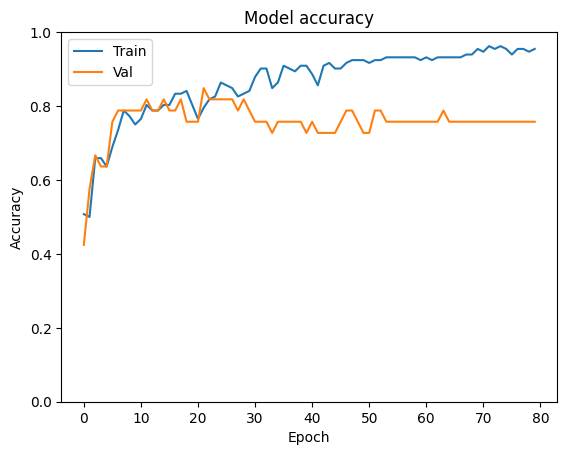

In [74]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

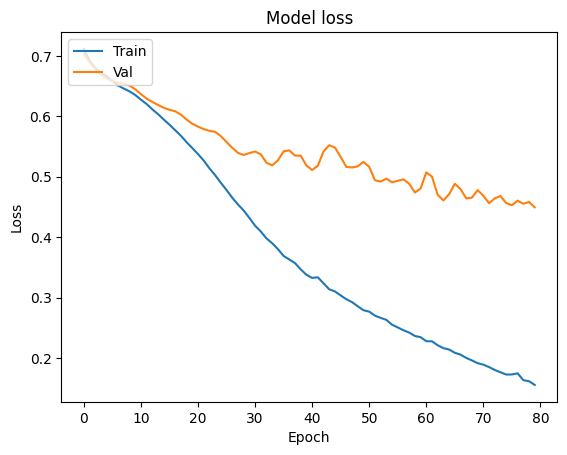

In [75]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [76]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6942957639694214
Test accuracy: 0.7142857313156128


Podemos ver que a partir del epoch 30 aproximadamente el aprendizaje se ha estancado y el modelo ha tendido a tener overfiting. Además el accuracy es bastabte bajo por lo que probaremos modificar ciertos parámetros para ver de que forma el modelo optimiza los resultados.

# PRUEBA 2: AUMENTAR CANTIDAD DE NEURONAS

In [121]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [122]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [123]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=60, batch_size=100, validation_split=0.2)

Epoch 1/60
2/2 [==============================] - 1s 186ms/step - loss: 0.7009 - accuracy: 0.4545 - val_loss: 0.6832 - val_accuracy: 0.6364
Epoch 2/60
2/2 [==============================] - 0s 33ms/step - loss: 0.6781 - accuracy: 0.6288 - val_loss: 0.6753 - val_accuracy: 0.6970
Epoch 3/60
2/2 [==============================] - 0s 31ms/step - loss: 0.6622 - accuracy: 0.6894 - val_loss: 0.6682 - val_accuracy: 0.6667
Epoch 4/60
2/2 [==============================] - 0s 31ms/step - loss: 0.6487 - accuracy: 0.7348 - val_loss: 0.6623 - val_accuracy: 0.6667
Epoch 5/60
2/2 [==============================] - 0s 36ms/step - loss: 0.6364 - accuracy: 0.7500 - val_loss: 0.6546 - val_accuracy: 0.6667
Epoch 6/60
2/2 [==============================] - 0s 34ms/step - loss: 0.6242 - accuracy: 0.7424 - val_loss: 0.6470 - val_accuracy: 0.6667
Epoch 7/60
2/2 [==============================] - 0s 30ms/step - loss: 0.6104 - accuracy: 0.7576 - val_loss: 0.6446 - val_accuracy: 0.6364
Epoch 8/60
2/2 [==========

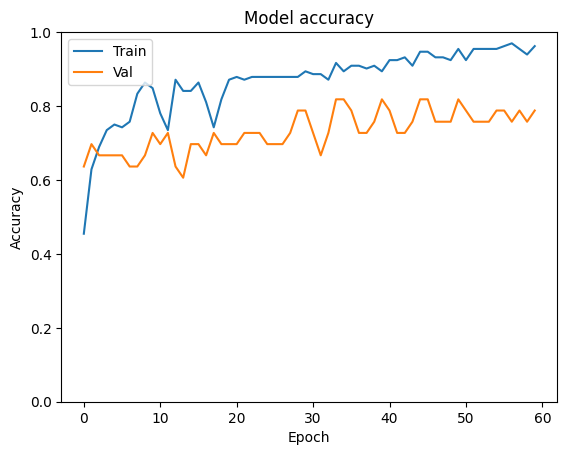

In [124]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

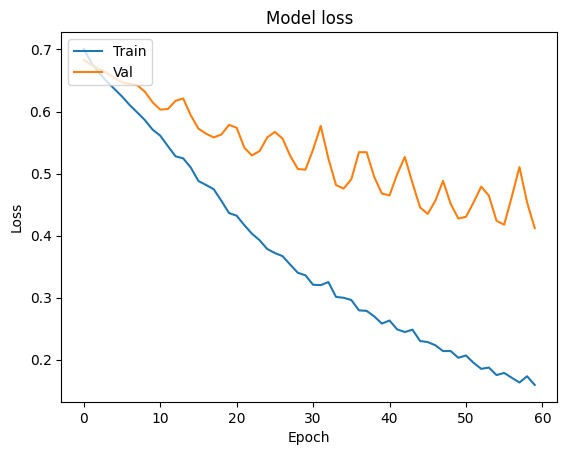

In [125]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [126]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5891642570495605
Test accuracy: 0.6904761791229248


Podemos ver que aunque haya mejorado un poco el accuracy del modelo el overfitting sifue presente por lo que procedo a disminuir los epoch. Además añadire más capas al modelo para ver si una red más compleja mejora el resultado.

# PRUEBA 3: AUMENTAR CATIDAD DE CAPAS OCULTAS, AUMENTAR BATCH SIZE Y DISMINUIR EPOCHS

In [83]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(95, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [85]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=50, batch_size=150, validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6973 - accuracy: 0.5227 - val_loss: 0.6932 - val_accuracy: 0.4545
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6891 - accuracy: 0.5379 - val_loss: 0.6871 - val_accuracy: 0.5455
Epoch 3/50
1/1 [==============================] - 0s 51ms/step - loss: 0.6822 - accuracy: 0.6667 - val_loss: 0.6807 - val_accuracy: 0.7273
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6755 - accuracy: 0.7727 - val_loss: 0.6744 - val_accuracy: 0.6970
Epoch 5/50
1/1 [==============================] - 0s 55ms/step - loss: 0.6686 - accuracy: 0.7500 - val_loss: 0.6679 - val_accuracy: 0.7273
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6610 - accuracy: 0.7348 - val_loss: 0.6615 - val_accuracy: 0.7273
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6526 - accuracy: 0.7500 - val_loss: 0.6548 - val_accuracy: 0.6970
Epoch 8/50
1/1 [=============

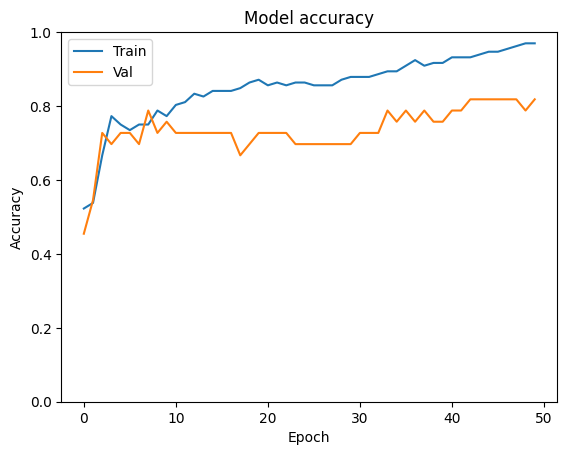

In [86]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

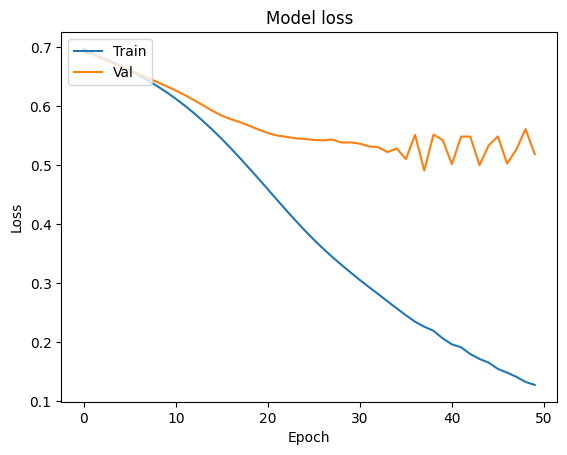

In [87]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [88]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8234578371047974
Test accuracy: 0.6666666865348816


Vemos que se sigue produciendose overfitting. Por este motivo voy a probar hacer un modelo más complejo pero con menos epochs con el fin de que no se produzca overfitting.

# PRUEBA 4: MODELO MÁS COMPLEJO

In [89]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [90]:

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 1000)              61000     
                                                                 
 dense_58 (Dense)            (None, 700)               700700    
                                                                 
 dense_59 (Dense)            (None, 500)               350500    
                                                                 
 dense_60 (Dense)            (None, 300)               150300    
                                                                 
 dense_61 (Dense)            (None, 100)               30100     
                                                                 
 dense_62 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1292701 (4.93 MB)
Trainable params: 129

In [91]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=45, batch_size=100, validation_split=0.2)

Epoch 1/45
2/2 [==============================] - 2s 216ms/step - loss: 0.6948 - accuracy: 0.4697 - val_loss: 0.7324 - val_accuracy: 0.4242
Epoch 2/45
2/2 [==============================] - 0s 49ms/step - loss: 0.6858 - accuracy: 0.5076 - val_loss: 0.6475 - val_accuracy: 0.7273
Epoch 3/45
2/2 [==============================] - 0s 32ms/step - loss: 0.6242 - accuracy: 0.6894 - val_loss: 0.6738 - val_accuracy: 0.6061
Epoch 4/45
2/2 [==============================] - 0s 33ms/step - loss: 0.6012 - accuracy: 0.6061 - val_loss: 0.6151 - val_accuracy: 0.6364
Epoch 5/45
2/2 [==============================] - 0s 57ms/step - loss: 0.5068 - accuracy: 0.8182 - val_loss: 0.5339 - val_accuracy: 0.6970
Epoch 6/45
2/2 [==============================] - 0s 71ms/step - loss: 0.4762 - accuracy: 0.6894 - val_loss: 0.6657 - val_accuracy: 0.6364
Epoch 7/45
2/2 [==============================] - 0s 53ms/step - loss: 0.4246 - accuracy: 0.8182 - val_loss: 0.5297 - val_accuracy: 0.7273
Epoch 8/45
2/2 [==========

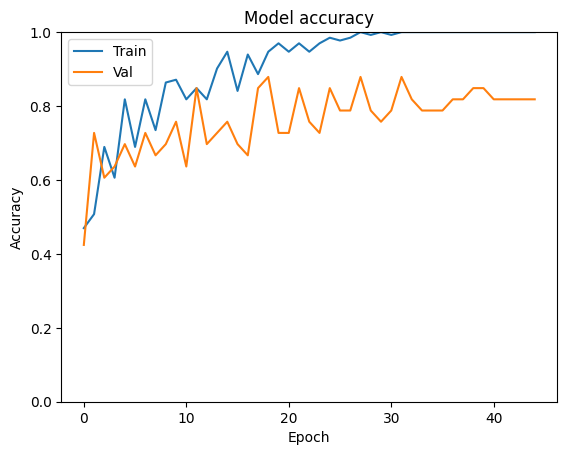

In [93]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

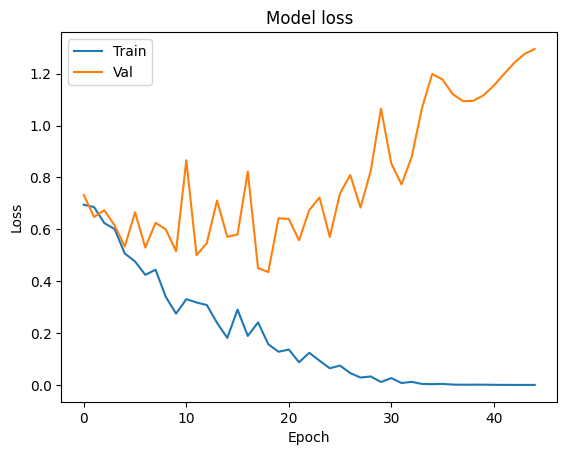

In [94]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [95]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.99856698513031
Test accuracy: 0.761904776096344


Si que ha mejorado bastante el modelo pero al final ha tendido al overfitting por lo que voy a seguir probando con redes más complejas

# PRUEBA 5

In [96]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [97]:

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1000)              61000     
                                                                 
 dense_64 (Dense)            (None, 800)               800800    
                                                                 
 dense_65 (Dense)            (None, 700)               560700    
                                                                 
 dense_66 (Dense)            (None, 500)               350500    
                                                                 
 dense_67 (Dense)            (None, 400)               200400    
                                                                 
 dense_68 (Dense)            (None, 200)               80200     
                                                                 
 dense_69 (Dense)            (None, 100)             

In [98]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [99]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=45, batch_size=27, validation_split=0.2)

Epoch 1/45
5/5 [==============================] - 3s 59ms/step - loss: 0.6978 - accuracy: 0.5152 - val_loss: 0.7317 - val_accuracy: 0.4242
Epoch 2/45
5/5 [==============================] - 0s 15ms/step - loss: 0.6233 - accuracy: 0.6515 - val_loss: 0.5733 - val_accuracy: 0.7273
Epoch 3/45
5/5 [==============================] - 0s 17ms/step - loss: 0.6051 - accuracy: 0.7045 - val_loss: 1.0692 - val_accuracy: 0.5152
Epoch 4/45
5/5 [==============================] - 0s 16ms/step - loss: 0.4846 - accuracy: 0.8258 - val_loss: 0.5838 - val_accuracy: 0.6970
Epoch 5/45
5/5 [==============================] - 0s 12ms/step - loss: 0.5562 - accuracy: 0.6667 - val_loss: 0.5417 - val_accuracy: 0.6364
Epoch 6/45
5/5 [==============================] - 0s 13ms/step - loss: 0.4641 - accuracy: 0.8030 - val_loss: 0.6049 - val_accuracy: 0.6667
Epoch 7/45
5/5 [==============================] - 0s 13ms/step - loss: 0.3795 - accuracy: 0.8258 - val_loss: 0.8205 - val_accuracy: 0.5758
Epoch 8/45
5/5 [===========

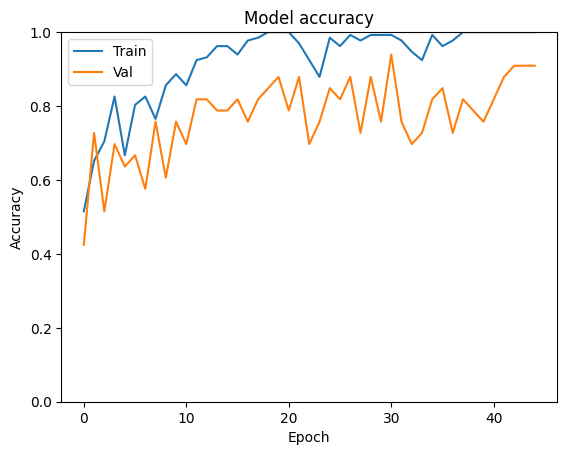

In [100]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

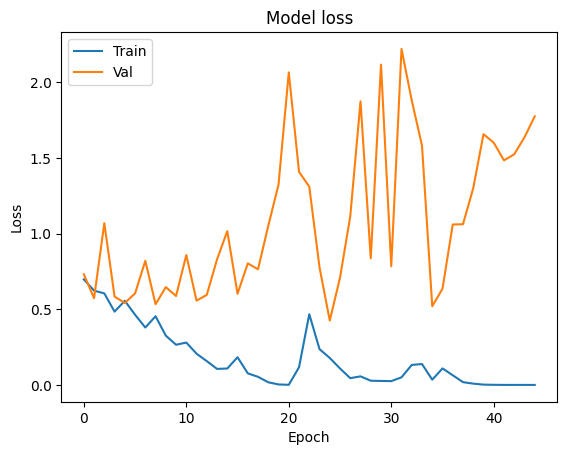

In [101]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [102]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 3.3161191940307617
Test accuracy: 0.8095238208770752


Vemos que aumentar la complejidad del modelo ha mejorado bastante el modelo y además se puede ver que con muchos menos epoch ya podría haber quedado entrenado.

# PRUEBA 6

In [103]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [104]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=35, batch_size=30, validation_split=0.2)

Epoch 1/35
5/5 [==============================] - 3s 87ms/step - loss: 0.7029 - accuracy: 0.4924 - val_loss: 0.6967 - val_accuracy: 0.4242
Epoch 2/35
5/5 [==============================] - 0s 47ms/step - loss: 0.6907 - accuracy: 0.5455 - val_loss: 0.6778 - val_accuracy: 0.5758
Epoch 3/35
5/5 [==============================] - 0s 37ms/step - loss: 0.6783 - accuracy: 0.6212 - val_loss: 0.6556 - val_accuracy: 0.6970
Epoch 4/35
5/5 [==============================] - 0s 35ms/step - loss: 0.5891 - accuracy: 0.8258 - val_loss: 0.6951 - val_accuracy: 0.5758
Epoch 5/35
5/5 [==============================] - 0s 34ms/step - loss: 0.5629 - accuracy: 0.7121 - val_loss: 0.6335 - val_accuracy: 0.6667
Epoch 6/35
5/5 [==============================] - 0s 31ms/step - loss: 0.4038 - accuracy: 0.8182 - val_loss: 0.7559 - val_accuracy: 0.6364
Epoch 7/35
5/5 [==============================] - 0s 30ms/step - loss: 0.3433 - accuracy: 0.8636 - val_loss: 0.5096 - val_accuracy: 0.7273
Epoch 8/35
5/5 [===========

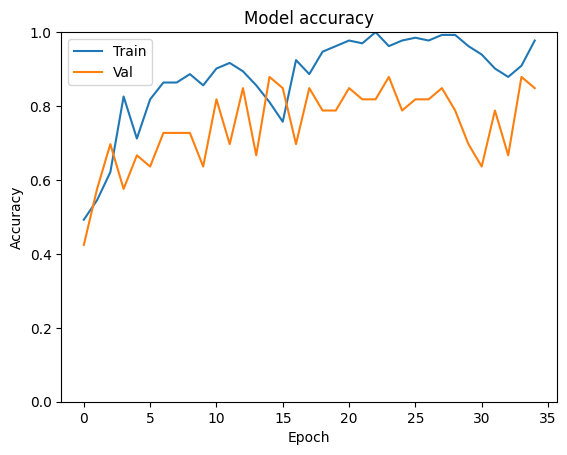

In [106]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

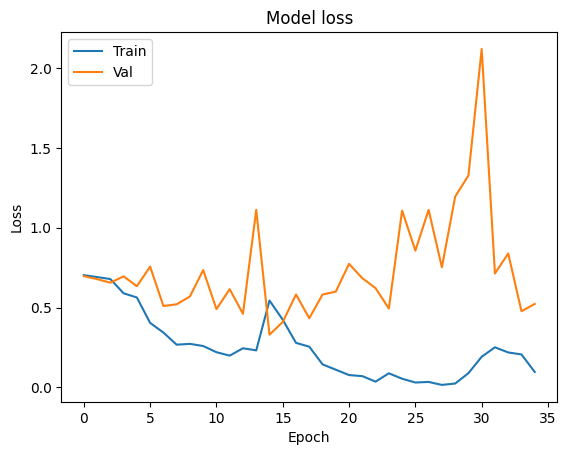

In [107]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [108]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9593124389648438
Test accuracy: 0.7857142686843872


podemos ver que este modelo no tiene tanto overfitting pero si que el otro daba un mayor accuracy para test llegando al 0.8

# PRUEBA 7

Ahora voy a probar una red en el que no se vaya disminuyendo progresivamente las neuronas de las capas para ver i de algun modo mejora el aprendizaje

In [109]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2000, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1500, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [110]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [111]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 3s 198ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6471 - val_accuracy: 0.6061
Epoch 2/15
2/2 [==============================] - 0s 33ms/step - loss: 0.7092 - accuracy: 0.4848 - val_loss: 0.6236 - val_accuracy: 0.6970
Epoch 3/15
2/2 [==============================] - 0s 34ms/step - loss: 0.6601 - accuracy: 0.6136 - val_loss: 0.6178 - val_accuracy: 0.6970
Epoch 4/15
2/2 [==============================] - 0s 36ms/step - loss: 0.6291 - accuracy: 0.6364 - val_loss: 0.6640 - val_accuracy: 0.5455
Epoch 5/15
2/2 [==============================] - 0s 43ms/step - loss: 0.6092 - accuracy: 0.7045 - val_loss: 0.6056 - val_accuracy: 0.6667
Epoch 6/15
2/2 [==============================] - 0s 32ms/step - loss: 0.5344 - accuracy: 0.8485 - val_loss: 0.5370 - val_accuracy: 0.8182
Epoch 7/15
2/2 [==============================] - 0s 32ms/step - loss: 0.4326 - accuracy: 0.8182 - val_loss: 0.6501 - val_accuracy: 0.6970
Epoch 8/15
2/2 [==========

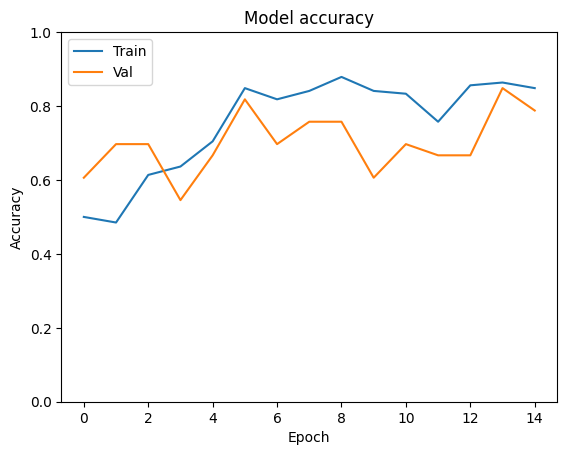

In [112]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

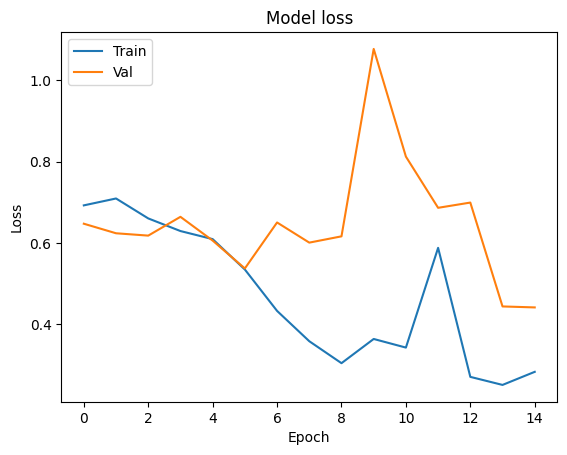

In [113]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [114]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6404361724853516
Test accuracy: 0.738095223903656


# PRUEBA 8

In [135]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1100, activation='relu'),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(600, activation='relu'),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [136]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [137]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 3s 301ms/step - loss: 0.6970 - accuracy: 0.4167 - val_loss: 0.7111 - val_accuracy: 0.4242
Epoch 2/30
2/2 [==============================] - 0s 65ms/step - loss: 0.7018 - accuracy: 0.5076 - val_loss: 0.7120 - val_accuracy: 0.4242
Epoch 3/30
2/2 [==============================] - 0s 66ms/step - loss: 0.6954 - accuracy: 0.5076 - val_loss: 0.6941 - val_accuracy: 0.4242
Epoch 4/30
2/2 [==============================] - 0s 53ms/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6850 - val_accuracy: 0.6364
Epoch 5/30
2/2 [==============================] - 0s 66ms/step - loss: 0.6748 - accuracy: 0.8106 - val_loss: 0.7209 - val_accuracy: 0.4242
Epoch 6/30
2/2 [==============================] - 0s 51ms/step - loss: 0.6707 - accuracy: 0.5076 - val_loss: 0.6925 - val_accuracy: 0.4545
Epoch 7/30
2/2 [==============================] - 0s 67ms/step - loss: 0.6156 - accuracy: 0.6439 - val_loss: 0.6287 - val_accuracy: 0.6667
Epoch 8/30
2/2 [==========

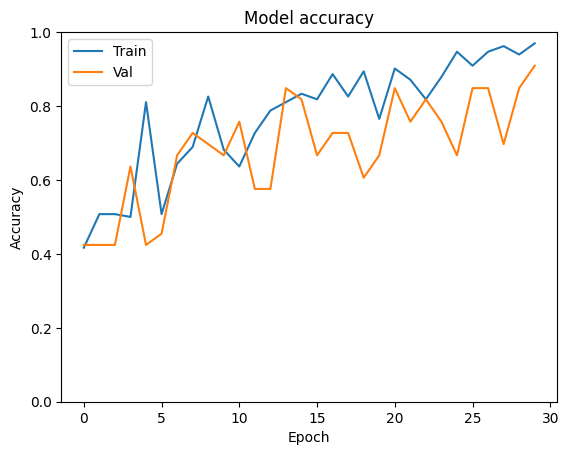

In [138]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

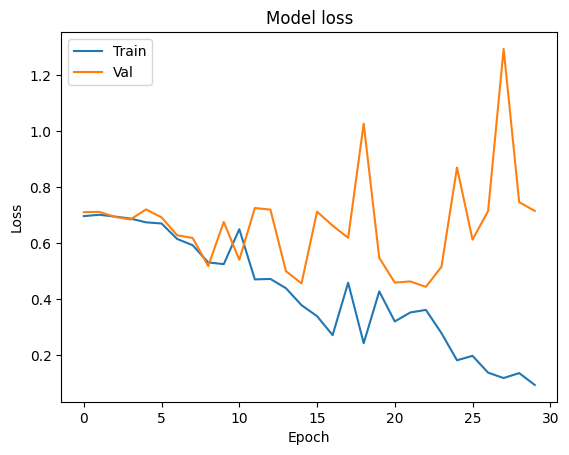

In [139]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [140]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.2329851388931274
Test accuracy: 0.7857142686843872


Podemos ver que este modelo tiene menos overfitting que otros que he probado pero no da el mejor accuracy

# CONCLUSIONES

Para este problema hemos conseguido tener mejores resultados gracias a aplicar redes neuronales más complejas ya que son los modelos que más accuracy han dado. Al trabajar con estas redes también he podido observar que si no se ajustan bien los parámetros las redes pueden tender al overfitting.

Los mejores modelos han sido la prueba 5 y la prueba 8 pero considero que la prueba 8 da mejor resultado ya que no hace tanto overfitting y el aumento del accuracy en train y test está más compensado.
